# Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf
import yahoofinancials
import seaborn as sn
from scipy.stats import anderson,kstest,shapiro, probplot

# Masalah.  
Misalkan portofolio saham dengan komposisi saham TLKM, BBNI, dan ASII. Akan dicari nilai return dengan variansi minimal dan juga dicari komposisi dari masing-masing saham.  

In [2]:
stock = ['TLKM.JK', 'BBNI.JK','ASII.JK', 'ANTM.JK', 'INDF.JK']
df = pd.DataFrame(columns=stock)
for i in stock :
    temp = yf.Ticker(i).history(period = '2y', interval = '1mo',actions=False)
    temp.dropna(inplace = True)
    temp['log_return'] = np.log(temp['Close']) - np.log(temp['Close'].shift(1))
    temp['log_return'].dropna(inplace = True)
    df[i] =temp['log_return'].dropna()

In [3]:
mu = df.mean().values
C = df.cov().values
e = np.ones(len(mu))
print(f'Vektor return {mu} dan \n matriks kovariansi \n {C} \n dan vektor e {e}')


Vektor return [0.01365404 0.027647   0.01836598 0.06588783 0.00061005] dan 
 matriks kovariansi 
 [[ 0.00557544  0.0043397  -0.00055464  0.00223329  0.00054331]
 [ 0.0043397   0.01106426  0.0019162   0.00409714  0.00386056]
 [-0.00055464  0.0019162   0.00762277  0.00711988 -0.0010938 ]
 [ 0.00223329  0.00409714  0.00711988  0.03077674 -0.00133608]
 [ 0.00054331  0.00386056 -0.0010938  -0.00133608  0.00482033]] 
 dan vektor e [1. 1. 1. 1. 1.]


In [4]:
# mu = np.array([1.1, 1.2, 1.3])
# C = np.array([[0.01, 0, 0], [0, 0.05, 0], [0, 0, 0.07]])
# e = np.ones(len(mu))
# print(f'Vektor return {mu} dan \n matriks kovariansi \n {C} \n dan vektor e {e}')


Dari masalah 
\begin{equation}
\min\left\{ -t \mu^T \mathbf{x} +  \frac{1}{2}\mathbf{x}^T C  \mathbf{x} | \mathbf{e}^T \mathbf{x} = 1 \right\}
\end{equation}
dengan $t$ adalah suatu parameter tak negatif.  
dapat diperoleh bahwa persamaan untuk efficient frontiernya adalah : 
\begin{equation}
\sigma^2_P - \beta_0 = \frac{(\mu_P - \alpha_0)^2}{\alpha_1}
\end{equation}
dengan :
\begin{align}
\alpha_0 = \mu^T h_0 \\
\alpha_1 = \mu^T h_1 \\
\beta_0 = h_0^TCh_0
\end{align}
dan 
\begin{align}
h_0 &= \frac{C^{-1}e}{e^TC^{-1}e} \\  
h_1 &= C^{-1}\mu - \frac{e^TC^{-1}\mu}{e^TC^{-1}e} C^{-1}e
\end{align}

In [5]:
h_0 = (np.linalg.inv(C).dot(e))/(e.dot(np.linalg.inv(C)).dot(e))
h_1 = np.linalg.inv(C).dot(mu) -((e.dot(np.linalg.inv(C)).dot(mu))/(e.dot(np.linalg.inv(C)).dot(e)))*(np.linalg.inv(C).dot(e))
print(f'Diperoleh \n h_0 {h_0}\n dan \n h_1 {h_1}')

Diperoleh 
 h_0 [ 0.44099691 -0.30167628  0.35206059 -0.01134999  0.51996877]
 dan 
 h_1 [-1.16931838  3.06600806 -1.01579496  1.81474254 -2.69563726]


In [6]:
alpha_0 = mu.dot(h_0)
alpha_1 = mu.dot(h_1)
beta_0 = h_0.dot(C).dot(h_0)
beta_2 = h_1.dot(C).dot(h_1)
print(f'Diperoleh \n alpha_0 : {alpha_0}, \n alpha_1 : {alpha_1}, \n beta_0 : {beta_0}\n beta_2 : {beta_2}')

Diperoleh 
 alpha_0 : 0.0037162638266703585, 
 alpha_1 : 0.16806889986475876, 
 beta_0 : 0.001211456838317449
 beta_2 : 0.16806889986475876


Sehingga persamaan Efficient Frontier - nya menjadi :  
\begin{equation}
\sigma^2_P - 0.00875 = \frac{(\mu_P - 1.125)^2}{0.035}
\end{equation}

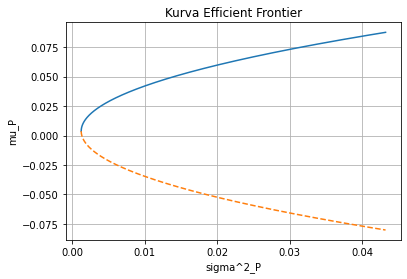

Nilai return dari variansi yang minimum adalah : 0.0037162638266703585
Dengan masing-masing proporsi saham TLKM, BBNI dan ASII adalah sebagai berikut : [ 0.44099691 -0.30167628  0.35206059 -0.01134999  0.51996877]


In [7]:
t = np.linspace(0,0.5, 1000)
sigma_P = beta_0 + t**2 *beta_2
mu_p = alpha_0 + t*alpha_1
mu_p_bawah = alpha_0 - t*alpha_1
plt.plot(sigma_P, mu_p)
plt.plot(sigma_P, mu_p_bawah, '--')
plt.xlabel('sigma^2_P')
plt.ylabel('mu_P')
plt.grid(True)
plt.title('Kurva Efficient Frontier')
plt.show()
print(f'Nilai return dari variansi yang minimum adalah : {np.min(mu_p)}')
print(f'Dengan masing-masing proporsi saham TLKM, BBNI dan ASII adalah sebagai berikut : {h_0}')

Misalkan ditambahkan sebuah asset \textit{risk-free} dengan \textit{rate of return} $r = 1.02$. Maka diperoleh capital market linenya sebagai berikut : 

In [8]:
h_0.sum()

1.0